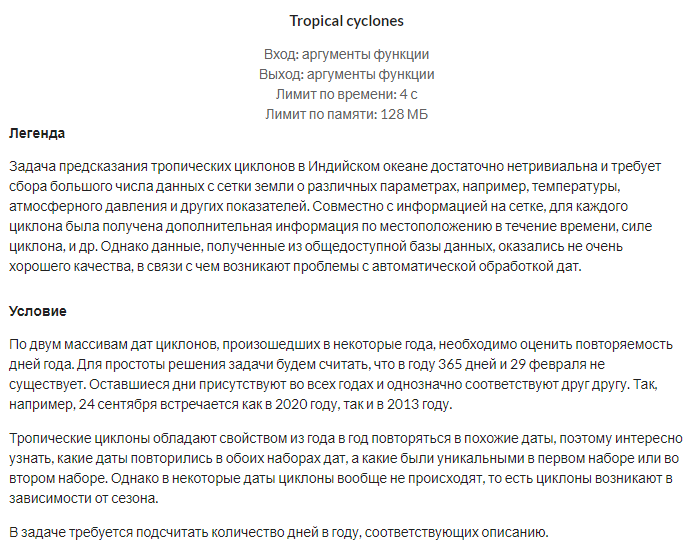

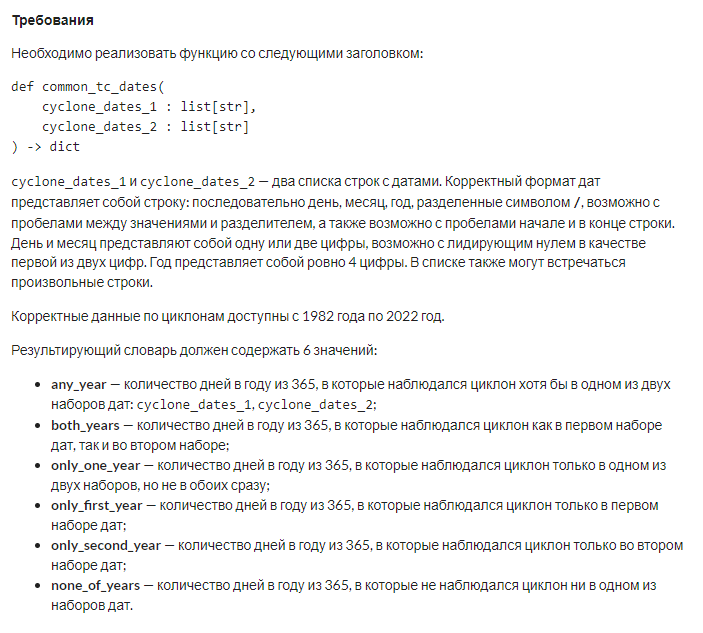

In [1]:
import re
def common_tc_dates(cyclone_dates_1, cyclone_dates_2):
    
    #days and month
    days_28  = ["0" + str(i) for i in range(1,10)] + [str(i) for i in range(10, 29)]
    days_30 = ["0" + str(i) for i in range(1,10)] + [str(i) for i in range(10,31)]
    days_31 = ["0" + str(i) for i in range(1,10)] + [str(i) for i in range(10,32)]
    months_days_30 = ['04', '06', '09', '11']
    months_days_31  = ['01', '03', '05', '07', '08', '10', '12']
    
    def date_update(start_list):
        res_set = set()
        update_list = []
        
        for i in start_list:
            s = i.replace(" ", "")
            update_list.append([j for j in s.split("/")])

        for j in update_list:
            for x in range(0,2):
                if len(j[x]) == 1:
                    j[x] = '0'+ j[x]

        for i in update_list:
            if 1982 <= int(i[2]) <= 2022:
                if (i[0] in days_28 and i[1] == '02') or (i[0] in days_30 and i[1] in months_days_30 ) or (i[0] in days_31 and i[1] in months_days_31):
                    res_set.add(i[0]+ '/' + i[1])

        return res_set
    
    def dict_dates(update_cyclone1, update_cyclone2):
        result_dict = {
        "any_year": 0, 
        "both_years": 0, 
        "only_one_year": 0,
        "only_first_year": 0, 
        "only_second_year": 0, 
        "none_of_years": 0 }

        result_dict['any_year'] = len(set(update_cyclone1 | update_cyclone2))
        result_dict['both_years'] = len(update_cyclone1 & update_cyclone2)
        result_dict['only_first_year'] = len(update_cyclone1 - update_cyclone2)
        result_dict['only_second_year'] = len(update_cyclone2 - update_cyclone1)
        result_dict['only_one_year'] = result_dict['only_first_year'] + result_dict['only_second_year']
        result_dict['none_of_years'] = 365 - result_dict['any_year']
    
        return result_dict
    
    test_form = r"\s*\d{1,2}\s*/\s*\d{1,2}\s*/\s*\d{4}\s*"
    list_dates1 = []
    list_dates2 = []
    for i in range(len(cyclone_dates_1)):
        if re.match(test_form, cyclone_dates_1[i]):
            list_dates1.append(cyclone_dates_1[i])
            
    update_cyclone1 = date_update(list_dates1)
        
    for i in range(len(cyclone_dates_2)):
        if re.match(test_form, cyclone_dates_2[i]):
             list_dates2.append(cyclone_dates_2[i])
                
    update_cyclone2 = date_update(list_dates2)
    
    result = dict_dates(update_cyclone1, update_cyclone2)
    
    return result